In [ ]:
!pip install deep-translator

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.6 MB/s eta 0:00:00


In [ ]:
from deep_translator import GoogleTranslator
test = GoogleTranslator(source = "ro", target = "en").translate("Ma numesc Andreea")
print(test)

My name is Andreea


TextBlob.sentiment cuprinde polarity si subjectivity. Polarity tine de sentiment, range [-1.0, 1.0]. Subjectivity are un interval de [0.0, 1.0] - 0.0 is very objective and 1.0 is very subjective

In [ ]:
!pip install nltk
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def make_translation(post):
    list_sentences = nltk.tokenize.sent_tokenize(post)
    translated_text = ""
    for sentence in list_sentences:
        try:
            translated_sentence = GoogleTranslator(source='ro', target='en').translate(sentence)

            if translated_sentence is not None:
                translated_text += translated_sentence + " "
            else:
                translated_text += sentence + " "

        except Exception as e:
            print(f"Error translating sentence: {sentence}\nError: {e}")
            translated_text += sentence + " "
    return translated_text

In [ ]:
import json
import pandas as pd

In [ ]:
train_data = pd.read_csv('shuffled_train_data.csv', index_col = None)
train_labels = pd.read_csv('shuffled_train_labels.csv', index_col = None)

test_data = pd.read_csv('test_data.csv',index_col = None)
test_labels = pd.read_csv('test_labels.csv',index_col = None)

validation_data = pd.read_csv('validation_data.csv',index_col = None)
validation_labels = pd.read_csv('validation_labels.csv',index_col = None)

In [ ]:
train_df = pd.DataFrame({'text': train_data.iloc[:, 0], 'label': train_labels.iloc[:, 0]})
test_df = pd.DataFrame({'text': test_data.iloc[:, 0], 'label': test_labels.iloc[:, 0]})
validation_df = pd.DataFrame({'text': validation_data.iloc[:, 0], 'label': validation_labels.iloc[:, 0]})

In [ ]:
validation_df

,text,label
0,E greu examenul pentru traducator autorizat? S...,no_depression
1,"Rodditori cu tahicardie? Salutari, sunt curios...",no_depression
2,Este absolut minunat cum intr-o tara care a da...,no_depression
3,"Intru in depresie, nu la facultate [rant] Sunt...",no_depression
4,Citeste pentru BAC direct pe e-mail \nSalutare...,no_depression
...,...,...
661,"In stil casual, va invit sa ne strangem la un ...",true_depression
662,Am nevoie de ajutor Nici macar nu stiu cum sa ...,true_depression
663,Mama a crede in tot feluri de medicini alterna...,true_depression
664,"Cu ce fel de podele veneau ""echipate"" apartame...",true_depression


In [ ]:
#test
test_df_mic = train_df[2:5].copy()
test_df_mic['translate'] = test_df_mic['text'].apply(make_translation)
test_df_mic

,text,label,translate
2,Experiente care v-au schimbat mentalitatea Bun...,no_depression,"Experiences that changed your mentality Hello,..."
3,Subreddit-ul asta ar trebui sa se numeasca r/d...,no_depression,"This subreddit should be called r/depression, ..."
4,Era ticalosilor Entr’acte\n\nUnchiul meu. Unul...,no_depression,It was the Entr'acte scoundrels\n\nmy uncle On...


**Translate - dureaza mult, 3-4-5 ore**

In [ ]:
train_df['translate'] = train_df['text'].apply(make_translation)

Error translating sentence: Am ceva probleme emotionale care nu mi-au prea permis sa am relatii cu fete, cel putin nu relatiile pe care mi le doream.
Error: Am ceva probleme emotionale care nu mi-au prea permis sa am relatii cu fete, cel putin nu relatiile pe care mi le doream. --> No translation was found using the current translator. Try another translator?
Error translating sentence: Sau ce incerc sa fac e prea putin sa conteze.
Error: Sau ce incerc sa fac e prea putin sa conteze. --> No translation was found using the current translator. Try another translator?
Error translating sentence: Poate am nevoie de o doza de optimism, poate pur si simplu trebuie sa invat sa accept realitatea.
Error: Poate am nevoie de o doza de optimism, poate pur si simplu trebuie sa invat sa accept realitatea. --> No translation was found using the current translator. Try another translator?
Error translating sentence: Dupa 3 ani, am gatit acasa pentru 8 colegi de job - o cina foarte faina, si m-am simti

In [ ]:
train_df.to_csv('train_df_translated.csv', index=False)

In [ ]:
test_df['translate'] = test_df['text'].apply(make_translation)

In [ ]:
test_df.to_csv('test_df_translated.csv', index=False)

In [ ]:
validation_df['translate'] = validation_df['text'].apply(make_translation)

In [ ]:
validation_df.to_csv('validation_df_translated.csv', index=False)

### **TextBlob**

In [ ]:
from textblob import TextBlob
import matplotlib.pyplot as plt

In [ ]:
test_df_translated = pd.read_csv('test_df_translated.csv', index_col = None)
train_df_translated = pd.read_csv('train_df_translated.csv', index_col = None)
validation_df_translated = pd.read_csv('validation_df_translated.csv', index_col = None)

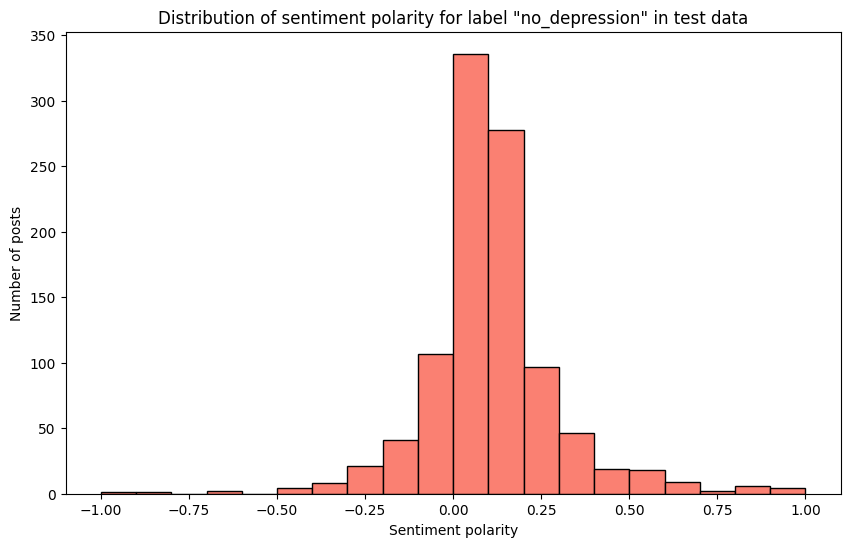

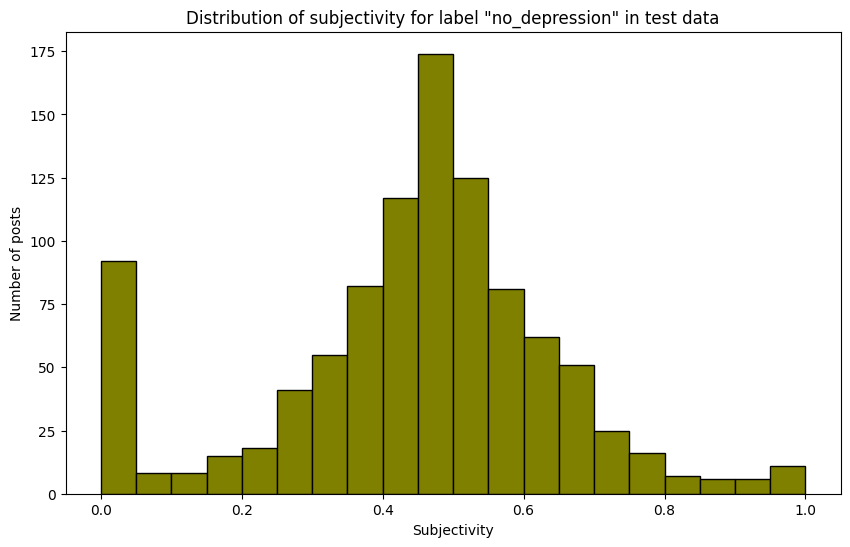

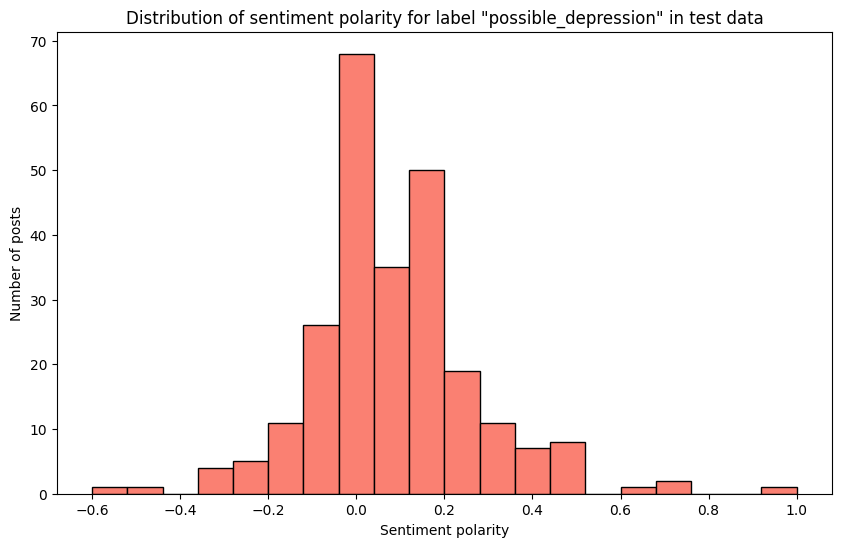

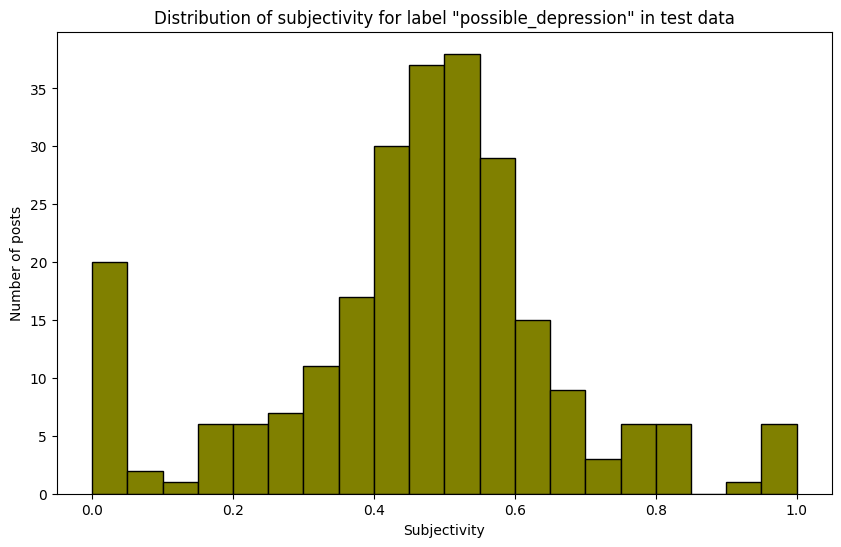

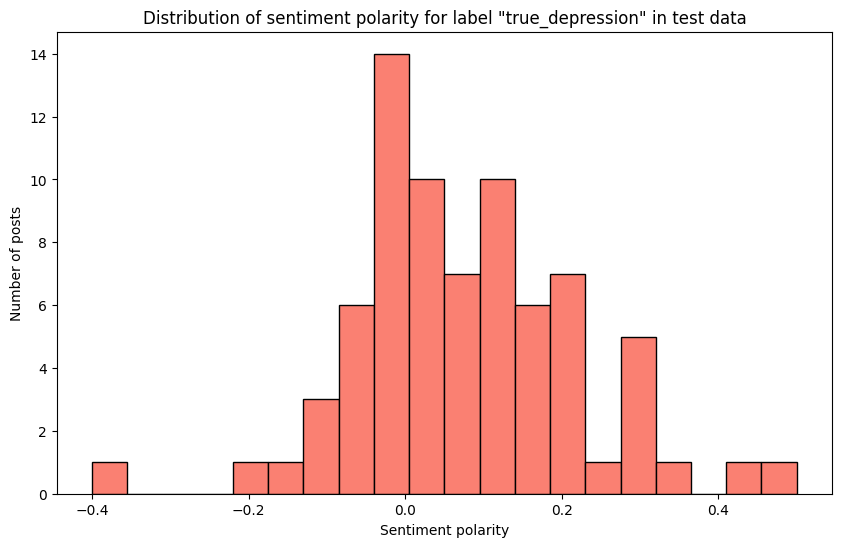

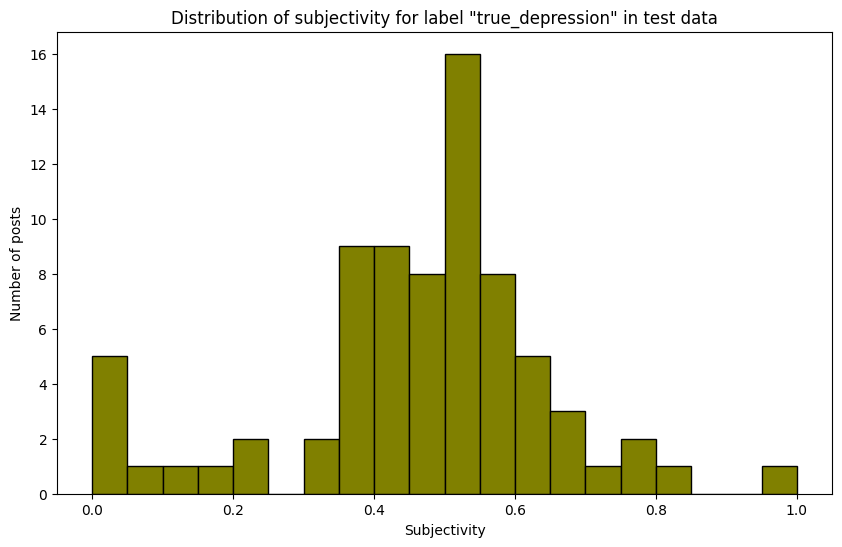

In [ ]:
def calculate_sentiment(text):
    analysis = TextBlob(text)
    return analysis.polarity, analysis.subjectivity

def sentimentTextBlob(df, category):
    df[['polarity', 'subjectivity']] = df['translate'].apply(lambda x: pd.Series(calculate_sentiment(x)))

    for label in df['label'].unique():
        df_label = df[df['label'] == label]

        plt.figure(figsize=(10, 6))
        plt.hist(df_label['polarity'], bins=20, color='salmon', edgecolor='black')
        plt.title(f'Distribution of sentiment polarity for label "{label}" in {category} data')
        plt.xlabel('Sentiment polarity')
        plt.ylabel('Number of posts')
        plt.show()

        plt.figure(figsize=(10, 6))
        plt.hist(df_label['subjectivity'], bins=20, color='olive', edgecolor='black')
        plt.title(f'Distribution of subjectivity for label "{label}" in {category} data')
        plt.xlabel('Subjectivity')
        plt.ylabel('Number of posts')
        plt.show()


sentimentTextBlob(test_df_translated, 'test')

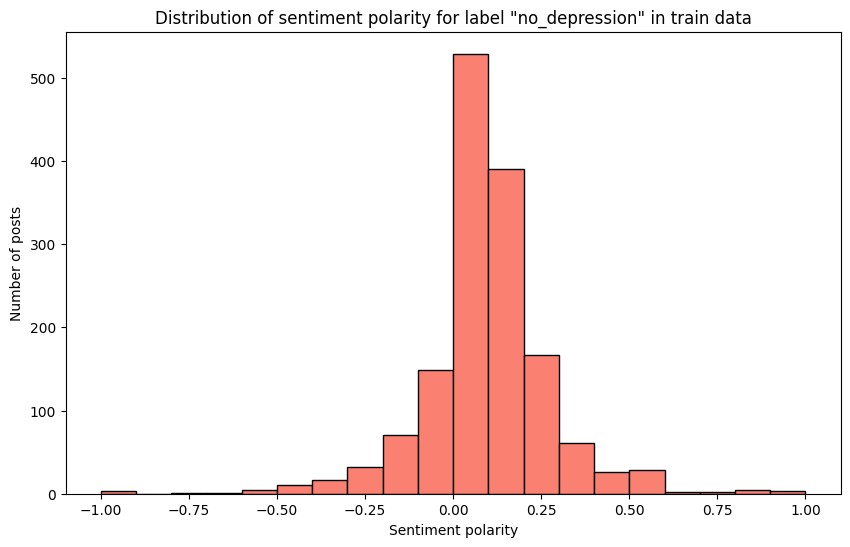

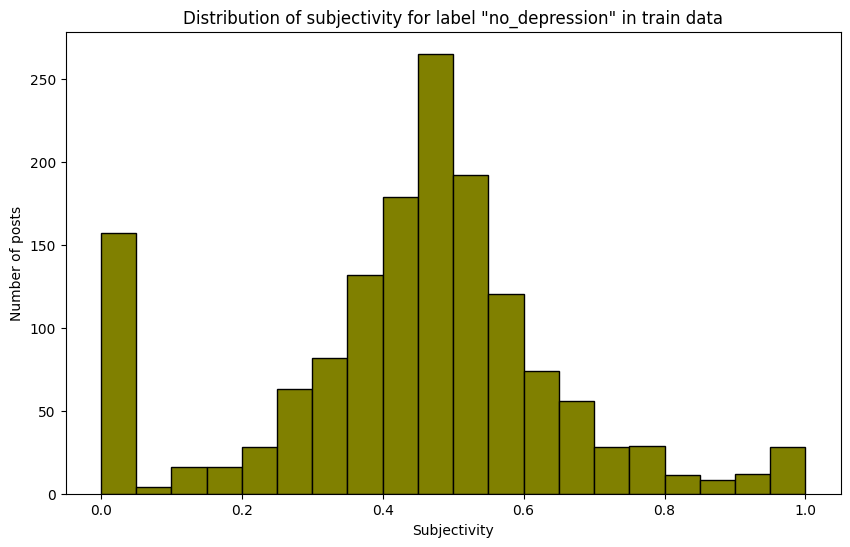

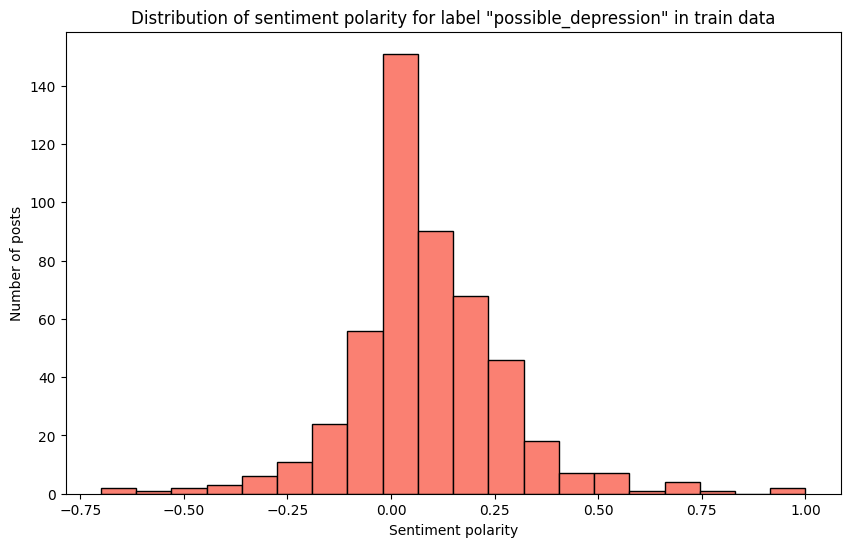

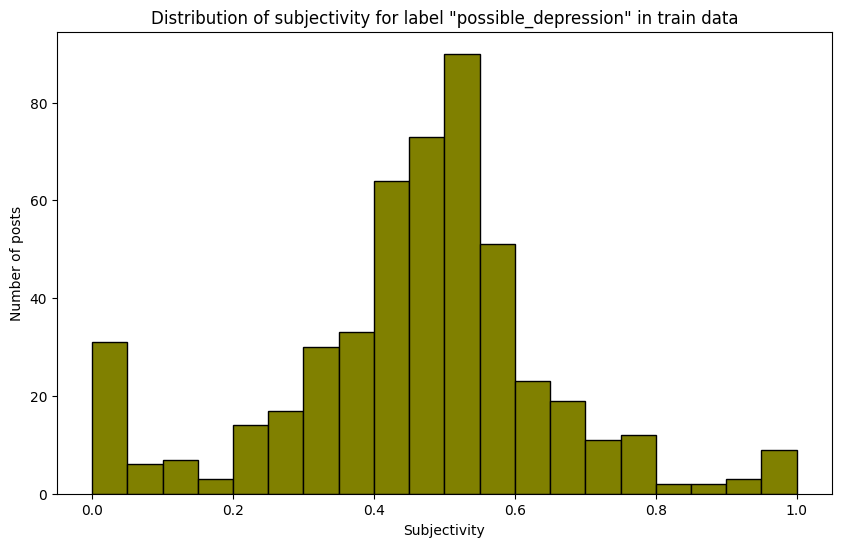

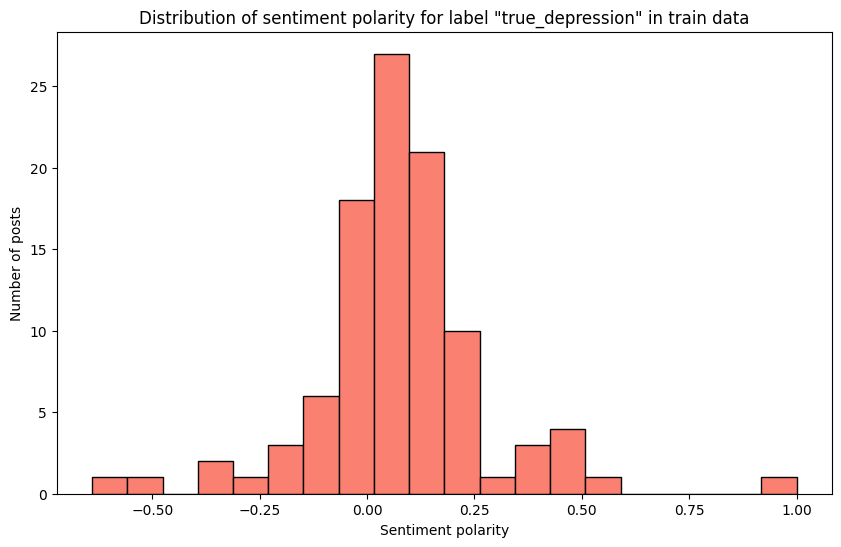

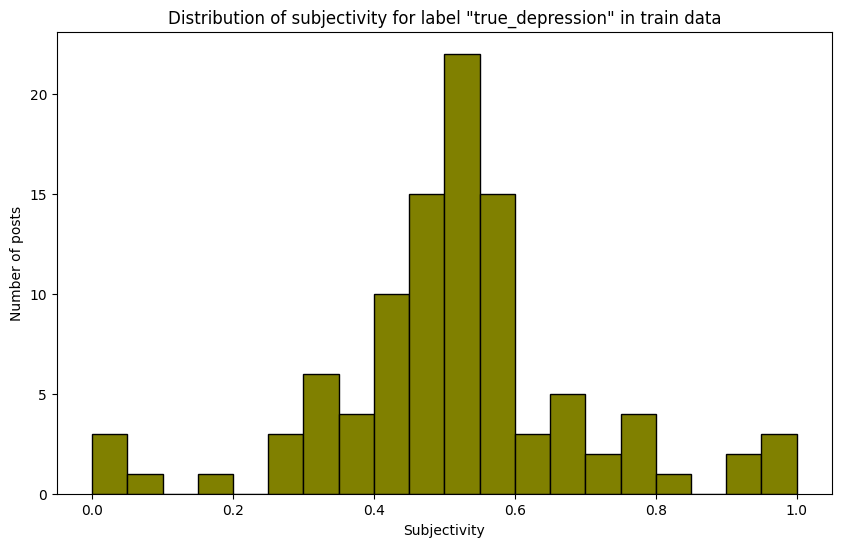

In [ ]:
sentimentTextBlob(train_df_translated, 'train')

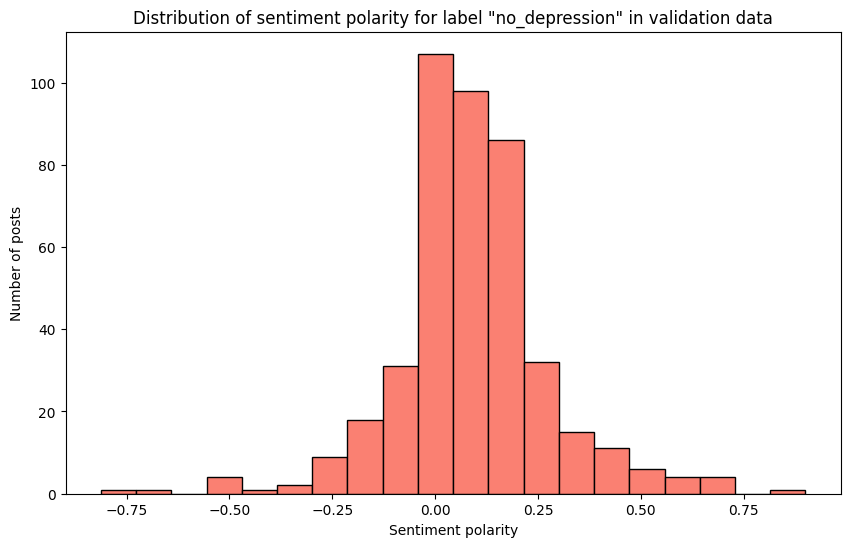

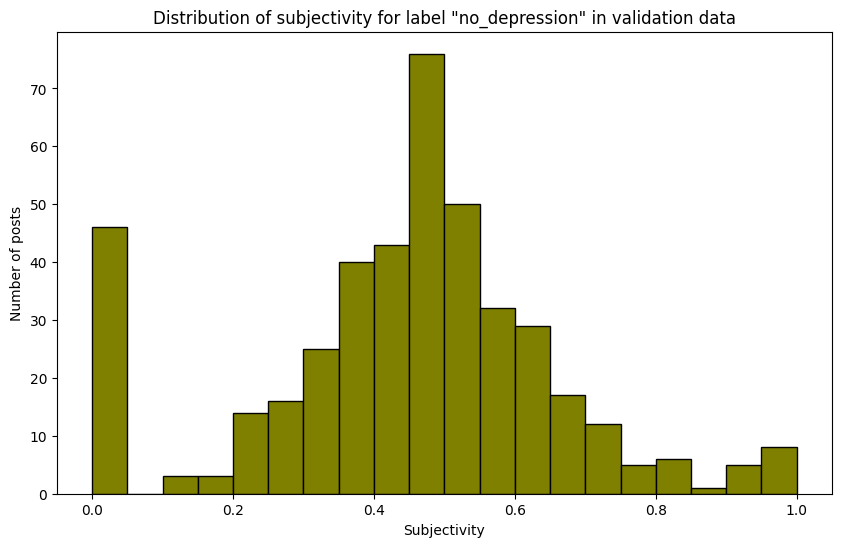

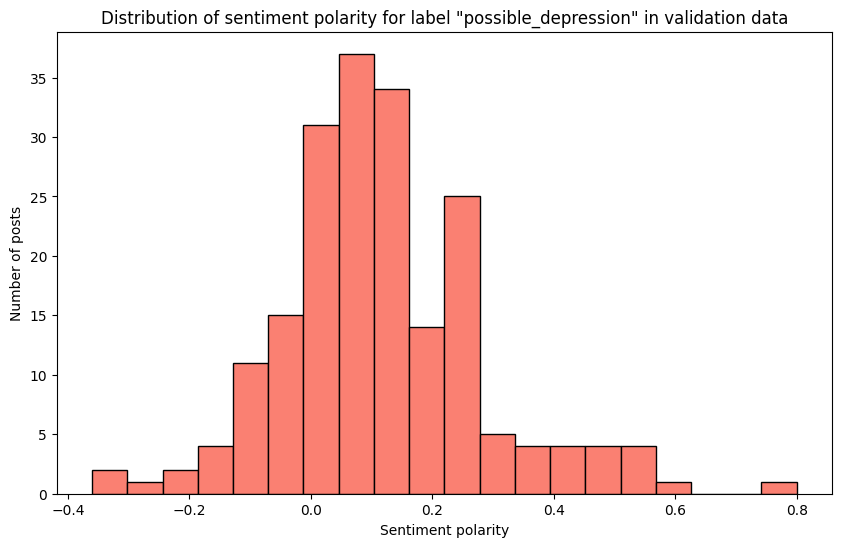

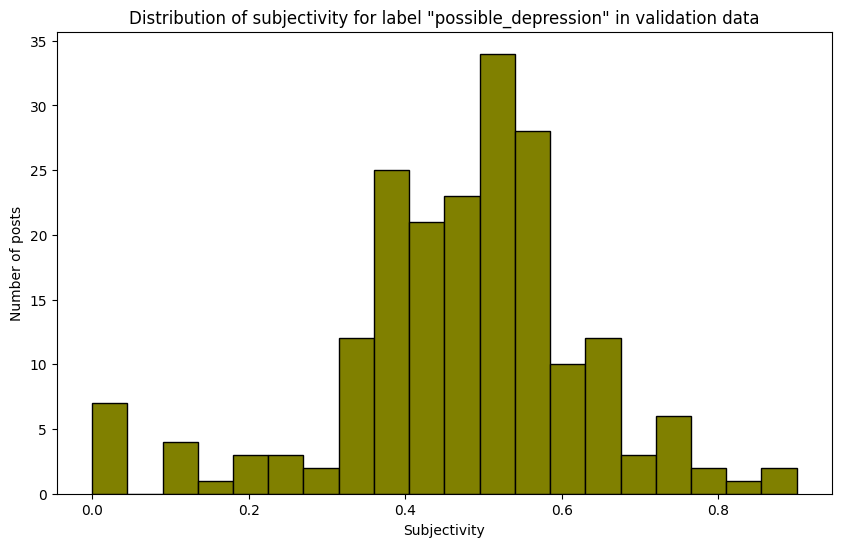

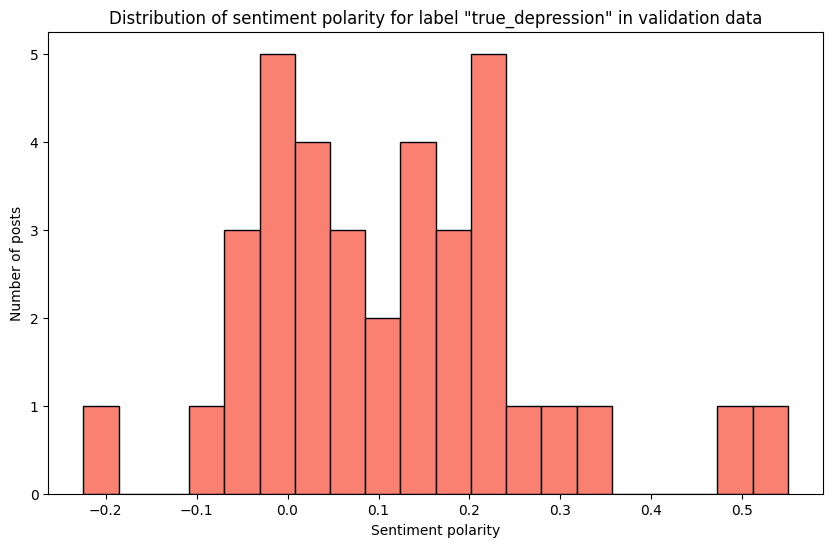

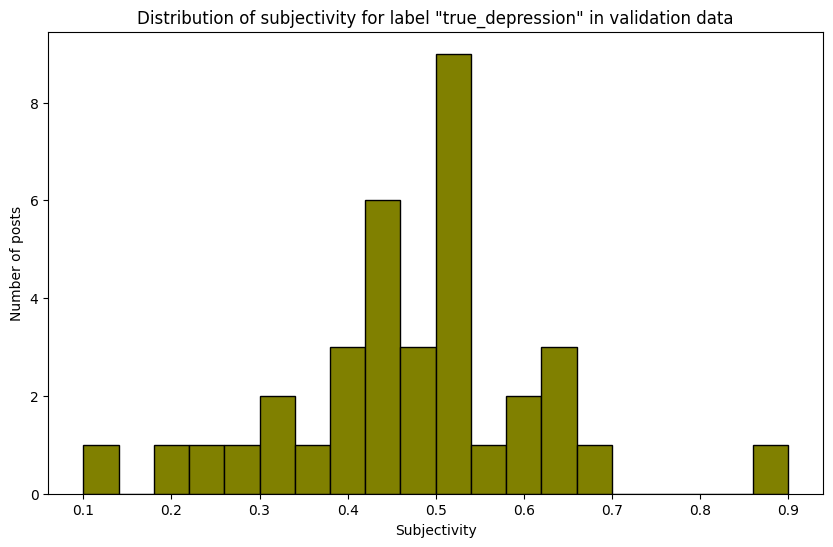

In [ ]:
sentimentTextBlob(validation_df_translated, 'validation')

### **VADER**

In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.1 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
def calculate_vader_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    sentiment_dict = analyzer.polarity_scores(text)
    return sentiment_dict['compound'], sentiment_dict['pos'], sentiment_dict['neu'], sentiment_dict['neg']

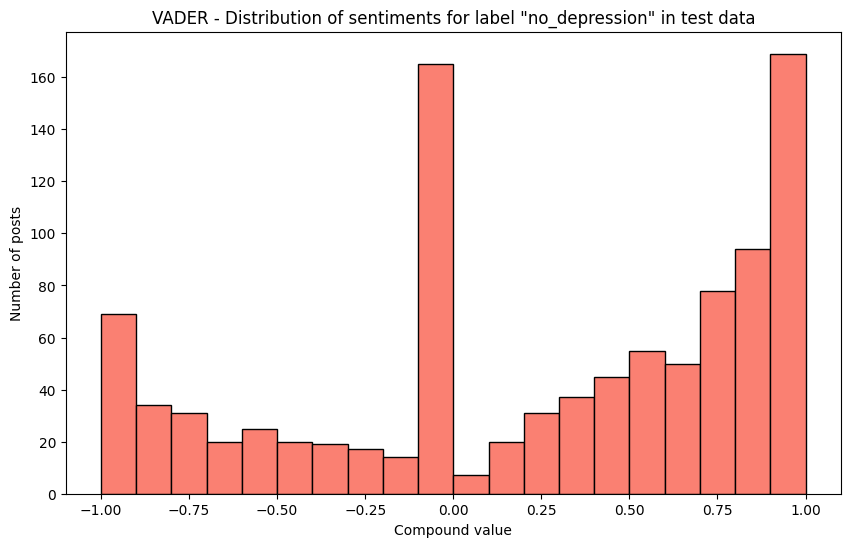

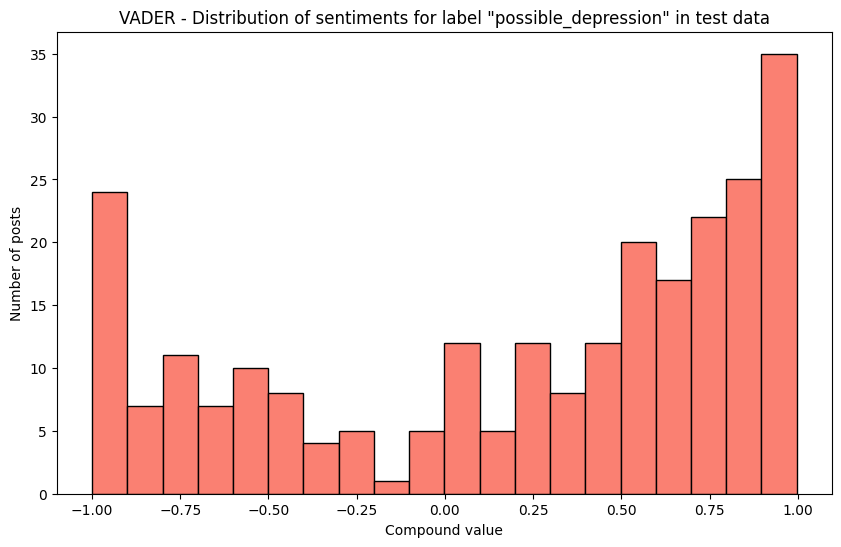

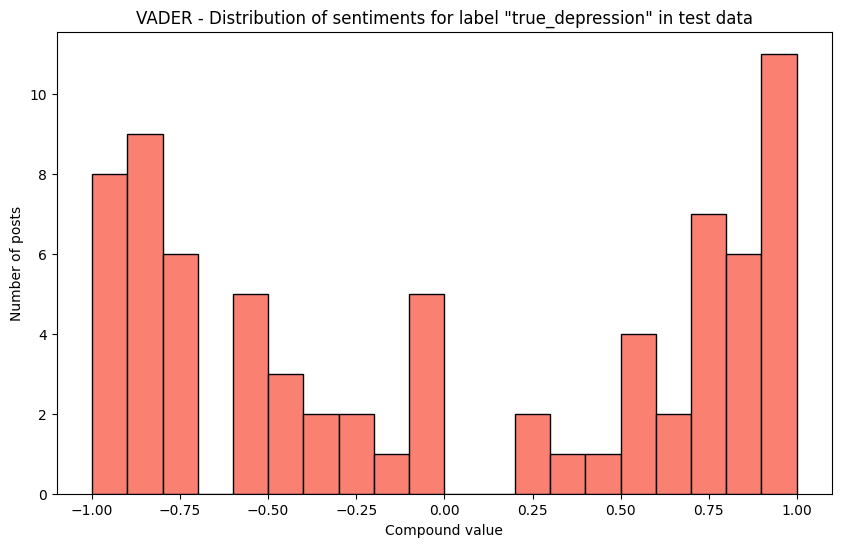

In [ ]:
def sentimentVADER(df, category):
    df[['compound', 'positive', 'neutral', 'negative']] = df['translate'].apply(lambda x: pd.Series(calculate_vader_sentiment(x)))

    for label in df['label'].unique():
        df_label = df[df['label'] == label]

        plt.figure(figsize=(10, 6))
        plt.hist(df_label['compound'], bins=20, color='salmon', edgecolor='black')
        plt.title(f'VADER - Distribution of sentiments for label "{label}" in {category} data')
        plt.xlabel('Compound value')
        plt.ylabel('Number of posts')
        plt.show()


sentimentVADER(test_df_translated, 'test')


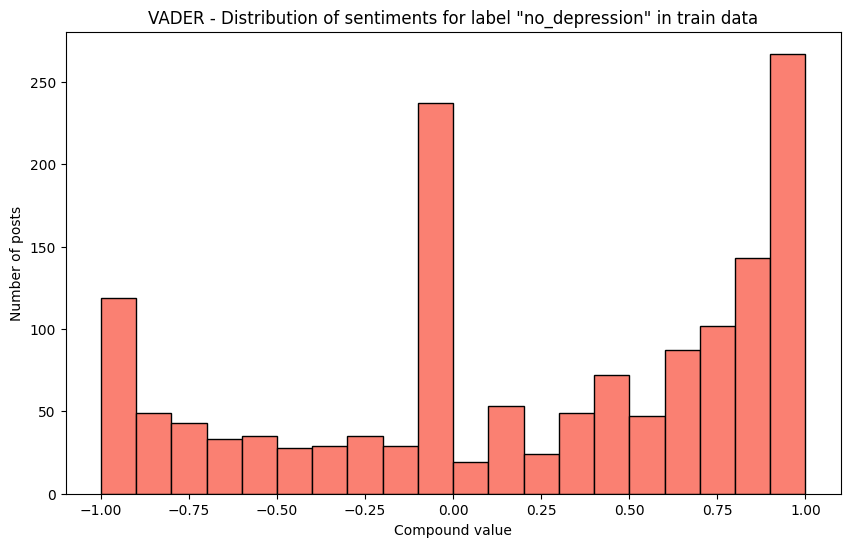

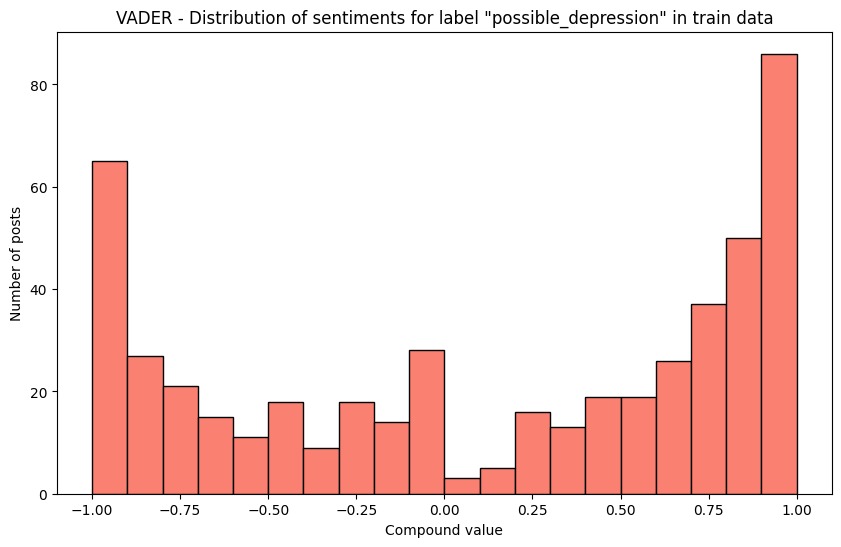

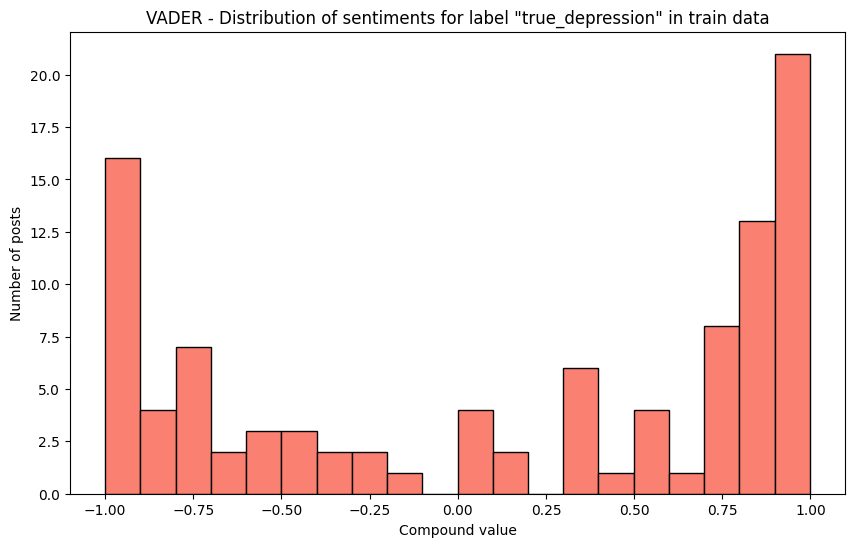

In [ ]:
sentimentVADER(train_df_translated, 'train')

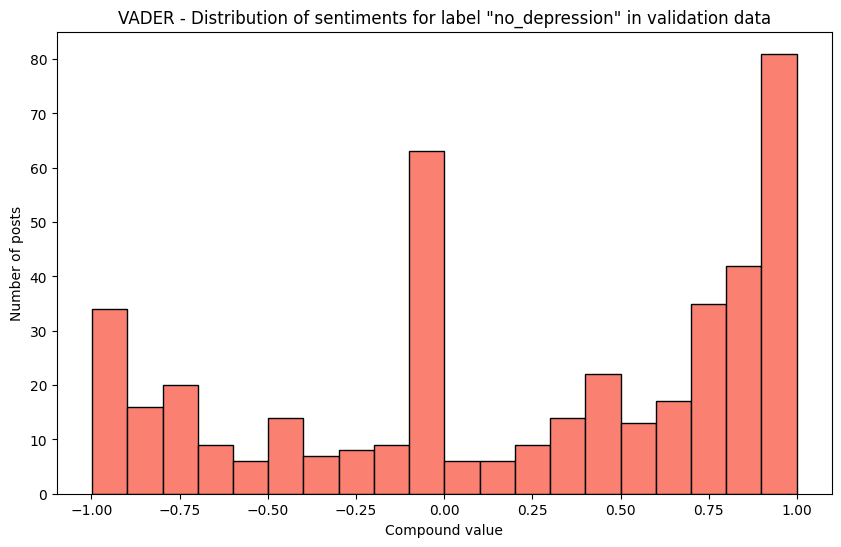

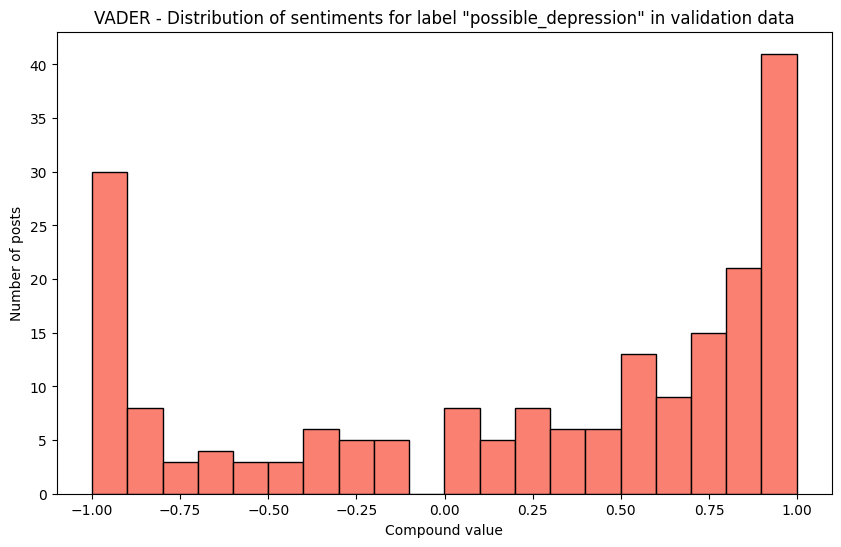

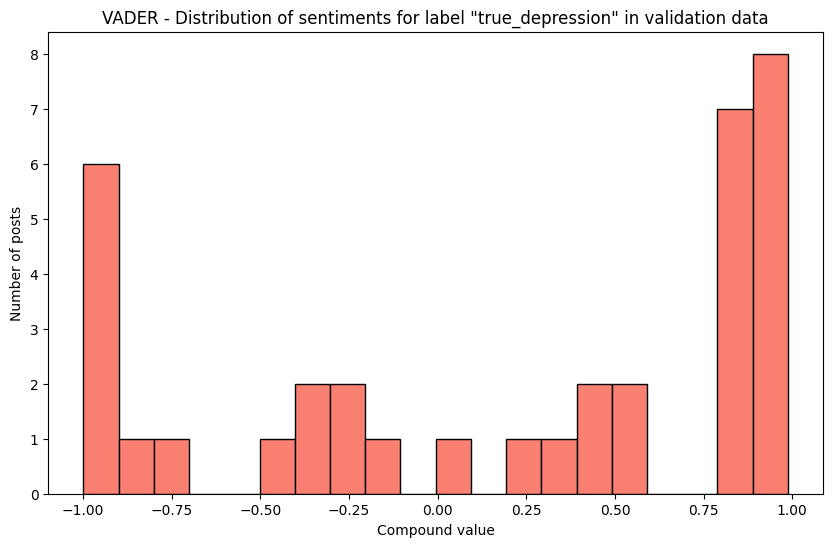

In [ ]:
sentimentVADER(validation_df_translated, 'validation')